In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Generate synthetic dat
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Perform hierarchical clustering using AgglomerativeClustering
# Note: Set 'distance_threshold=0' to compute the full dendrogram, not just labels
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
clustering.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [6]:
# Create the linkage matrix for the dendrogram
Z = linkage(X_scaled, method='ward')

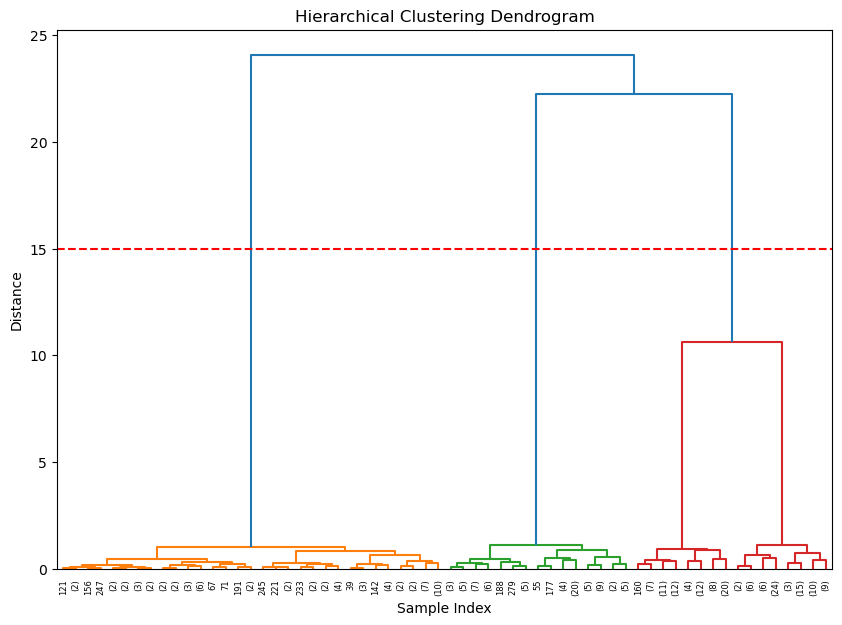

In [11]:
#  Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='level', p=5)  # 'p=5' to show the top 5 levels of the dendrogram
plt.show()

In [8]:
# 6. Compute silhouette score for a chosen number of clusters (e.g., 4)
# Agglomerative clustering with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_pred = agg_cluster.fit_predict(X_scaled)


In [9]:
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f'Silhouette Score for 4 clusters: {silhouette_avg:.2f}')

Silhouette Score for 4 clusters: 0.88
